Definimos un problema que consiste en simular el recorrido de un agente que hace desde un punto inicial en un mapa laberinto, donde se puede encontrar con obstáculos que obstruyan su camino. El objetivo del agente es llegar a una meta marcada dentro del mapa.

-----------------------------------------------------------------------------


Para simular este problema, se contará con la siguiente información:

Mapa del laberinto (board): define la estructura del ambiente, indicando donde están los obstáculos (se marcan con '#', y indica dónde está la meta ('x') y dónde se encuentra el agente ('o').


Meta (goal): indica dónde está la meta ('x') en términos de coordenadas del mapa [x,y].

-----------------------------------------------------------------------------


La simulación del problema, además cuenta con las siguientes funciones:

actions: dado un estado, regresa las acciones legales, que corresponden a los movimientos que puede realizar el agente sin toparse con un obstáculo.


result: dado un estado y una acción, regresa el estado resultante de ejecutar la acción en el estado dado.

move: realiza el movimiento en la simulación; es decir, desplaza el agente de su estado previo a un nuevo estado.

draw: Dibuja el mapa en formato de imagen.

is_goal: revisa si el estado es meta o no. Puede haber más de una meta.

In [1]:
class Maze(object):
    """Simulador de laberinto"""
    def __init__(self, board):
        #Define el laberinto
        self.board = [list(x) for x in board.split("\n") if x]
        #Guardo el estado inicial
        self.goal = None

        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] == 'o':
                    #El inicial es el estado con el símbolo 'o'
                    self.initial = (x,y)
                elif self.board[y][x] == 'x':
                    #La meta es el estado con el símbolo 'x'
                    self.goal = (x,y)

    def __str__(self):
        return '\n'.join([''.join(symbols) for symbols in self.board])

    def actions(self, state):
        """Define las posibles acciones permitidas en cada estado"""
        actions = []
        for action in ["up","down","left","right"]:
            newx, newy = self.result(state, action)
            #Una acción no permitida es aquella donde se
            #topa con un símbolo # que indica pared
            if self.board[newy][newx] != "#":
                actions.append(action)
        return actions

    def result(self, state, action):
        """Calcula el estado resultante de la acción"""
        #Determina el estado actual
        x, y = state
        #Genera el resultado de las acciones
        if action.count("up"):
            y += 1
        if action.count("down"):
            y -= 1
        if action.count("left"):
            x -= 1
        if action.count("right"):
            x += 1

        new_state = (x, y)
        return new_state

    def move(self, state, new_state, symbol='o'):
        """Cambia la posición del agente de un estado a otro"""
        #Estado anterior y posterior
        x,y = state
        new_x, new_y = new_state
        if self.board[new_y][new_x] == ' ':
            #Mueve al agente al mismo estado
            self.board[y][x] = ' '
            self.board[new_y][new_x] = symbol
        else:
            pass

    def draw(self):
        """Dibuja el mapa"""
        import matplotlib.pyplot as plt
        import numpy as np
        #Crea imagen
        img = np.ones((len(self.board), len(self.board[0]), 4))
        for i, row in enumerate(self.board):
            for j, element in enumerate(row):
                #Colorea al agente de azul, la meta de verde y los
                #obstáculos de negro
                if element == '#':
                    img[i,j] = np.array([0,0,0,1])
                elif element == 'o':
                    img[i,j] = np.array([0.2,0.5,0.8,1])
                elif element == 'x':
                    img[i,j] = np.array([0.2,0.9,0.5,1])

        plt.imshow(img)
        plt.show()

    def is_goal(self, state):
        """Determina si un estado es meta"""
        return state == self.goal

In [2]:
mapa = """
##############################
# o         #              # #
######  #   ##########  #  # #
#       #   ##          #    #
#  #           #   #####     x
##############################
"""

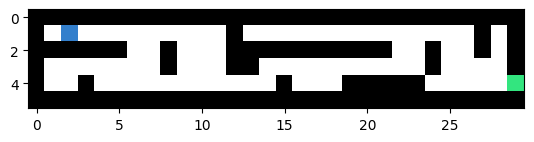

Coordenadas inicial: (2, 1)
Coordenadas meta: (29, 4)


In [3]:
ent = Maze(mapa)
ent.draw()
print('Coordenadas inicial: {}\nCoordenadas meta: {}'.format(ent.initial, ent.goal))

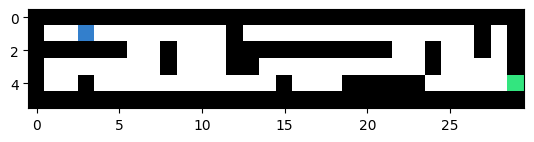

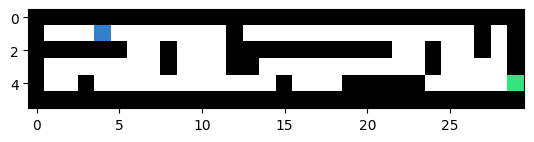

In [4]:
new_state = ent.result(ent.initial, "right")
ent.move(ent.initial, new_state)
ent.draw()
ent.move(new_state, ent.result(new_state, "right") )
ent.draw()

##Algoritmo de búsqueda primero en amplitud
El algoritmo de búsqueda primero en amplitud o **breadth first search** se basa en expandir los nodos del árbol de búsqueda de manera ordenada, jerárquica; primero expandirá el nodo raíz y posteriormente cada uno de sus hijos. Entonces procederá a expandir los hijos del primer nodo que expandió primero y así hasta expandir todos los nodos.

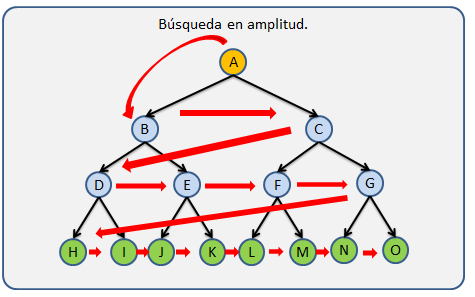


Es decir, el algoritmo de primero en amplitud expande todos los nodos de un nivel de profundidad del árbol primero para pasar a expandir los del siguiente nivel.

Aquí presentamos una implementación del algoritmo de primero en amplitud para solucionar el problema del laberinto,

##Pila FIFO

El algoritmo primero en amplitud requiere de una pila de tipo FIFO, asimismo, definiremos una clase para los nodos del árbol y una función para expandir estos nodos construyendo los nodos hijos.

Pila
La pila **FIFO (First-In-First-Out)** es una pila que hace pop sobre los elementos que han entrado primero. De esta forma, en la expansión del árbol de búsqueda se tiene que los nodos que se expandirán primero son aquellos que están más arriba en la jerárquía del árbol, es decir, los de menor profundidad.

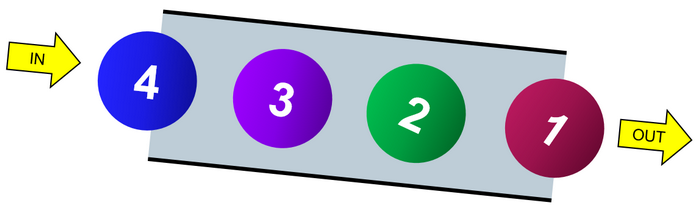


Para definir esta pila, usamos una lista que guarda los elementos/nodos. Definimos la función push que introducirá nuevos elementos, y la función pop que sacará al elemento en la cola de la pila. También requerimos de una función que nos indique cuando la pila está vacía, pues esta se usará en el algoritmo.

In [5]:
class FIFOQueue(object):
    """Clase de una cola FIFO en los problemas de búsqueda"""
    def __init__(self):
        self.queue = []

    def __str__(self):
        return ' '.join([str(q) for q in self.queue])

    def isEmpty(self):
        """Revisa si la pila es vacía"""
        return self.queue == []

    def push(self, element):
        """Introudce un elemento a la pila"""
        self.queue.append(element)

    def pop(self):
        """Saca el primer elemento de la pila"""
        first_element = self.queue[0]
        del self.queue[0]

        return first_element

    def top(self):
        """Muestra el elemento en el tope de la pila"""
        item = self.queue[0]

        return item

##Expansión de nodos

Definimos un nodo como un objecto que tendrá los siguientes elementos:
1) un estado, que indicará precisamente qué estado del mundo representa este nodo;
2) padre, que indica de dónde viene el nodo actual; y
3) acción, que indica que acción generó al nodo.

Para expandir los nodos, usamos las acciones legales y aplicamos la función que nos da el resultado de esa acción aplicada al estado actual. Con el resultado, generamos nuevos nodos hijos del árbol de búsqueda.

class Node(object): Esta clase se utiliza para representar nodos en un árbol de búsqueda. Cada nodo tiene los siguientes atributos:

state: Representa el estado asociado al nodo (posición en el laberinto).
parent: Referencia al nodo padre en el árbol.


action: La acción que llevó al estado actual desde el estado del nodo padre.
cost (comentado): En el código está comentado y no se utiliza, pero podría representar el costo acumulado para llegar al nodo desde el inicio. Su uso depende del problema específico.


expand(problem, node): Esta función toma un problema (como una instancia de la clase Maze que mencionamos anteriormente) y un nodo, y genera nodos hijos expandiendo el árbol de búsqueda. Utiliza la función **problem.actions** para obtener las acciones válidas desde el estado actual del nodo y, para cada acción, genera un nuevo estado (new_s) usando la función problem.result. Luego, crea un nuevo nodo (new_node) con la información correspondiente y lo devuelve utilizando un generador (yield). Este proceso se repite para todas las acciones válidas desde el estado actual.

-------------------------------------------------------------------------------

En resumen, la clase Node se utiliza para representar nodos en un árbol de búsqueda, y la función expand se encarga de generar nodos hijos expandiendo el árbol a partir de un nodo dado y un problema específico. Esto es común en algoritmos de búsqueda, donde se exploran estados sucesivos para encontrar una solución.

In [6]:
class Node(object):
    """Clase para crear nodos con sus atributos"""
    def __init__(self):
        self.state = (0,0)
        self.parent = None
        self.action = None
        #self.cost = 0 #El costo no es tomado en cuenta en este método

    def __str__(self):
        if self.parent == None:
            return "State: {}, Cost: {}".format(self.state,self.cost)
        else:
            return "State: {}, Action: {}, Parent: {}, Cost: {}".format(self.state,self.action,self.parent.state,self.cost)


def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    #Nodo inical
    s = node.state

    for action in problem.actions(s):
        #Ejecuta la acción
        new_s = problem.result(s, action)

        #Genera un nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action

        yield new_node

##Algoritmo

El algoritmo, como ya lo hemos señalado, buscará expandir los nodos de menor profunidad primero, por lo que se enfocará en la amplitud del árbol de búsqueda. Para esto, utiliza la pila FIFO para guardar la frontera. Los pasos que sigue el algoritmo son:

* Guarda el nodo inicial
* Genera la frontera con este primer nodo, y guarda los estados alcanzados
* Mientras la frontera no esté vacía realiza:
  * Expande el nodo con jerarquía más alta de la frontera
  * Revisa si el hijo no es meta, si lo es acaba
  * En otro caso, guarda el nodo hijo en la frontera si esté no ha sido alcanzado todavía
  * El algoritmo termina al alcanzar la meta, o bien al agotar los nodos posibles sin encontrar esta meta.

El algoritmo revisa si un nodo es meta inmediatamente cuando este surge en una expansión, estrategia que se conoce como Early Goal Test (prueba temprana de meta).

In [7]:
def BreadthFirstSearch(problem):
    """Algoritmo Breadth-First Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial

    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes

    #Frontera con cola de prioridad
    frontier = FIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)

        #Expande el nodo actual
        for child in expand(problem, node):
            #Guarda el estado del hijo
            state = child.state

            #Revisa si el nodo es meta
            if problem.is_goal(state):
                nodes.append(child)
                return nodes

            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)

    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error    return "No se ha logrado llegar a un estado final."

nodes = []: Inicializa una lista nodes para almacenar los nodos visitados durante la búsqueda.

node = Node(): Crea un nodo inicial vacío.

node.state = problem.initial: Asigna el estado inicial del problema al estado del nodo inicial.

if node in problem.goal:: Comprueba si el nodo inicial ya es la meta. Si es así, simplemente devuelve la lista vacía de nodos, indicando que ya estamos en el estado objetivo.

frontier = FIFOQueue(): Inicializa una cola (implementada por FIFOQueue) para mantener la frontera de nodos que se explorarán. La cola se utiliza en el orden FIFO (Primero en entrar, primero en salir).

frontier.push(node): Agrega el nodo inicial a la frontera para comenzar la exploración.

reached = {problem.initial: node}: Inicializa un diccionario reached para rastrear los nodos que ya se han alcanzado durante la búsqueda. El diccionario se utiliza para evitar expandir el mismo nodo más de una vez.

while frontier.isEmpty() == False:: Inicia un bucle que continuará hasta que la frontera esté vacía.

node = frontier.pop(): Extrae y quita un nodo de la frontera para explorarlo.

nodes.append(node): Agrega el nodo explorado a la lista de nodos.

for child in expand(problem, node):: Itera sobre los nodos hijos generados al expandir el nodo actual utilizando la función expand.

state = child.state: Obtiene el estado del hijo actual.

if problem.is_goal(state):: Comprueba si el estado del hijo es la meta. Si es así, agrega el nodo hijo a la lista de nodos y devuelve la lista, indicando que se ha encontrado una solución.

if state not in reached.keys():: Verifica si el estado del hijo aún no ha sido alcanzado.

reached[state] = child: Agrega el nodo hijo al diccionario reached con la clave del estado.

frontier.push(child): Agrega el nodo hijo a la frontera para su exploración posterior.

Finalmente, si la búsqueda no logra llegar a un nodo final, la función devuelve un mensaje de error.

En resumen, la función BreadthFirstSearch implementa el algoritmo BFS para encontrar una solución en un problema dado, utilizando una estructura de cola para gestionar la frontera y evitando la expansión de nodos ya alcanzados.


In [8]:
#Aplica el algortimo al problema
tree = BreadthFirstSearch(ent)

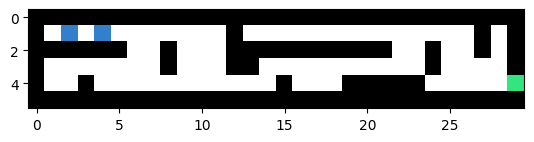

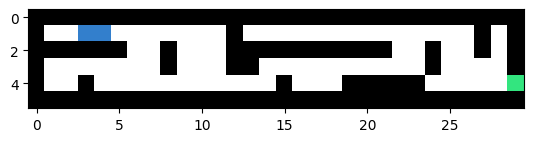

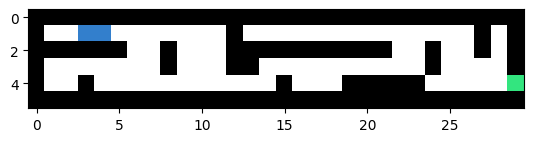

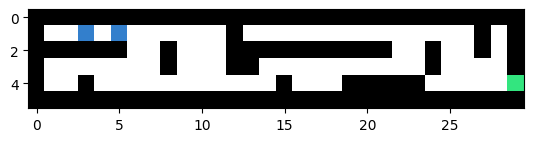

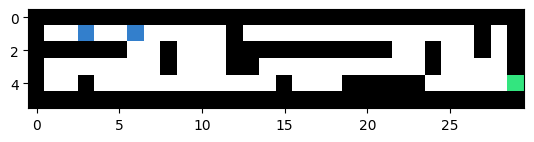

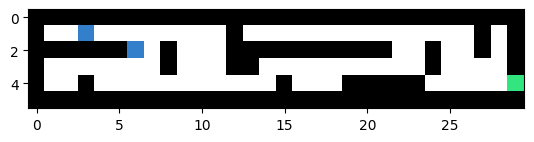

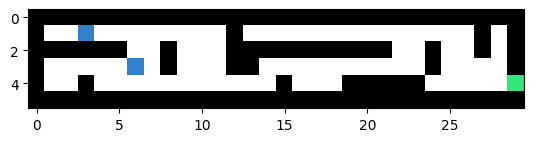

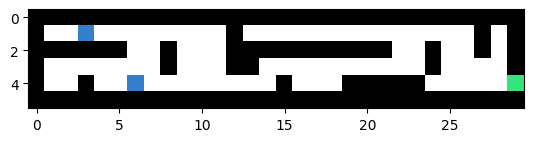

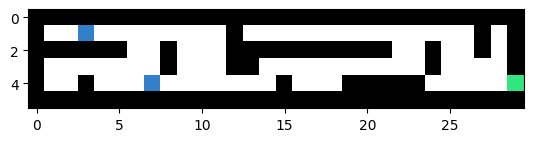

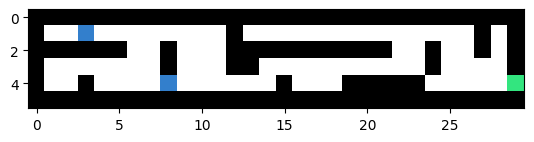

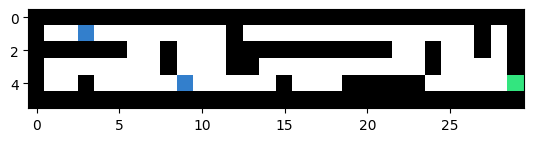

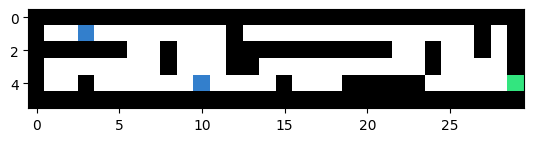

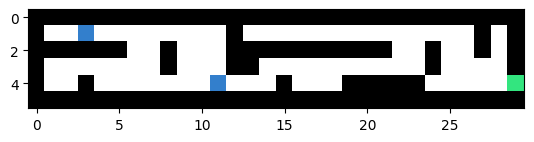

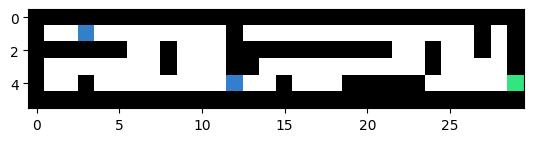

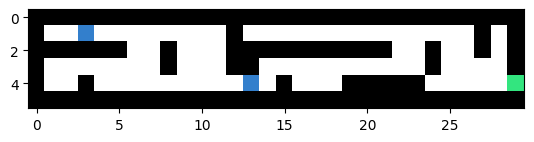

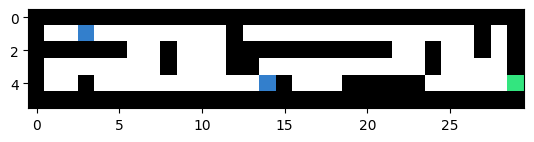

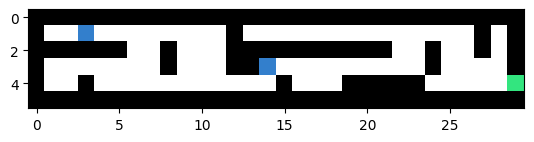

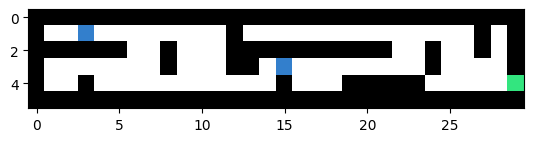

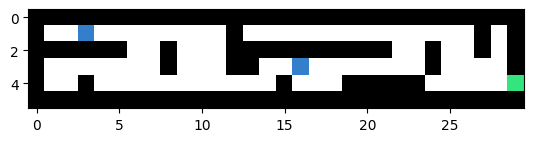

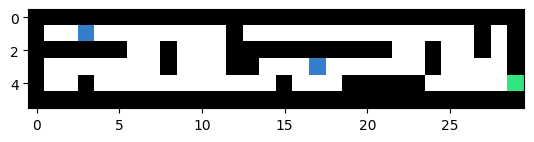

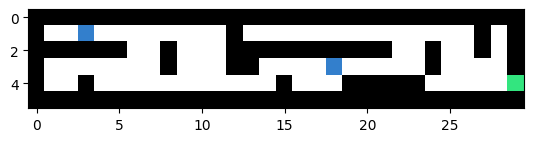

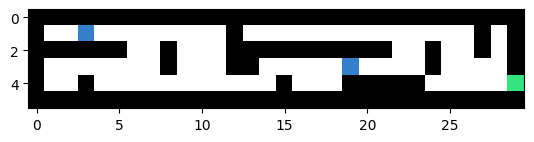

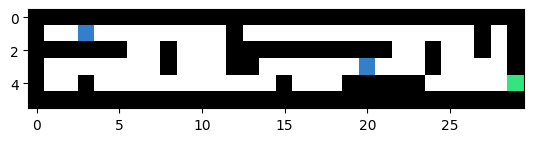

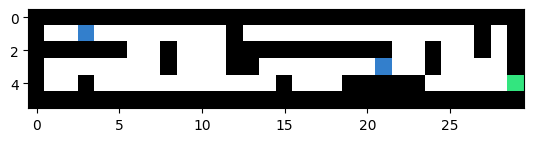

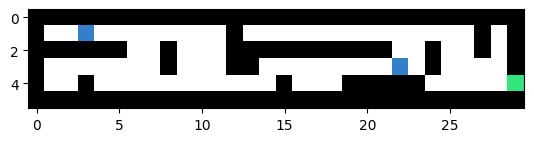

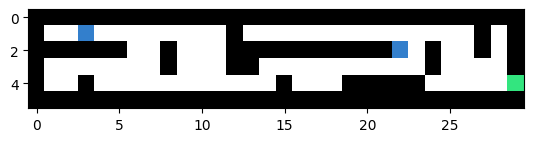

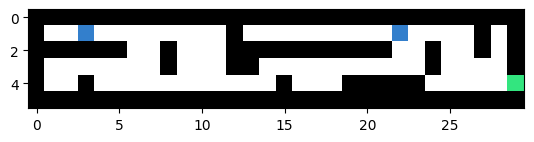

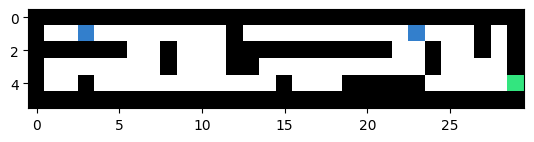

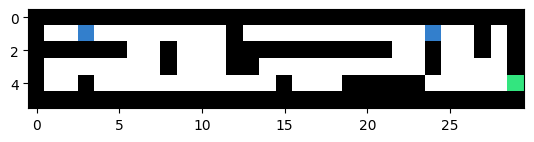

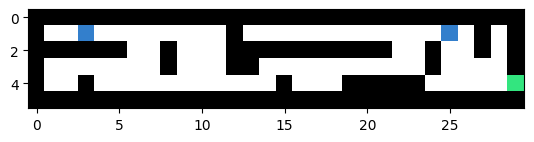

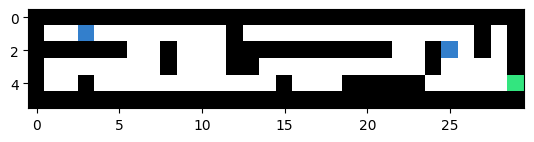

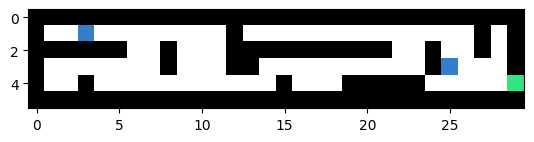

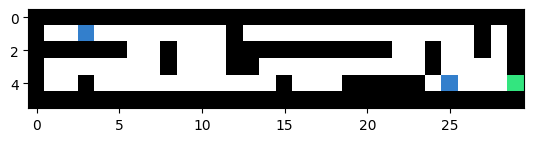

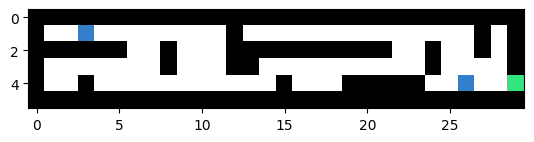

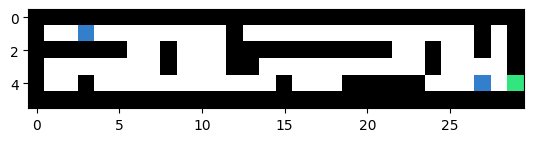

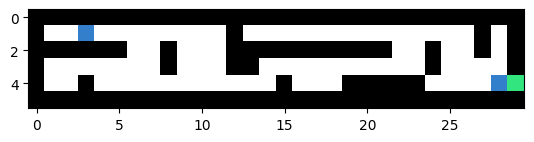

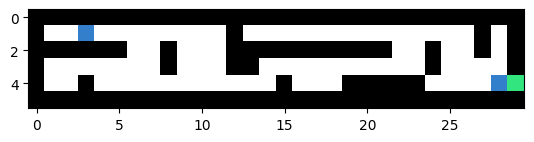

In [9]:
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino de acciones
    que llevaron a la meta."""
    #Meta
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial
    while parent.state != root:
        parent = parent.parent
        #Adjunta los padres en el camino
        path.append(parent)

    return path[::-1]

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    ent.draw()

El **algoritmo de búsqueda primero en profundidad** o depth-first search se basa en expandir los nodos que se encuentren a mayor profundidad en éste. De esta forma, los primeros nodos en expandirse serán aquellos que estén más bajo dentro de la profundidad del árlbol. Esto contrasta con el algoritmo de primero en amplitud, pues este algoritmo expandía, de manera contraria, los nodos de menor profundidad primero.

Esta estrategia permite al lagoritmo tratar de encontrar una solución en los nodos que resultaron de acciones consecutivas, en lugar de expandir priemero aquellos que ha expandido de una acción previa.

Aquí presentamos una implementación del algoritmo de primero en profundidad para solucionar el problema del laberinto, en donde buscamos llevar un punto 'o' hacia la meta marcada con 'x'. Generamos el laberinto.

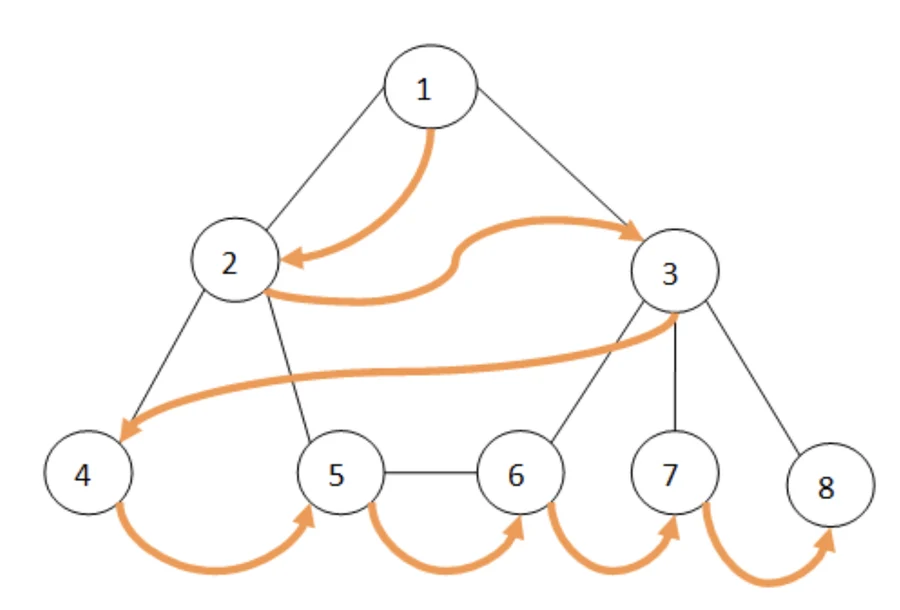


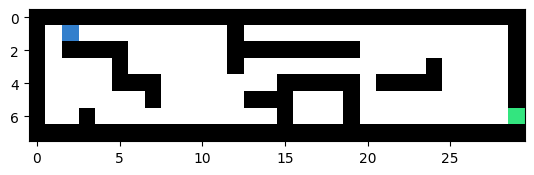

In [12]:
#from maze_simulator import Maze

mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""

ent = Maze(mapa)
ent.draw()

La cola LIFO (Last-In-First-Out) es una pila que hace pop sobre los elementos que han entrado al último. De esta forma, en la expansión del árbol de búsqueda se tiene que los nodos que se expandirán primero son aquellos que están a mayor profunidad en el árbol, que son los nodos que han entrado al último en la pila.

Para definir esta pila, usamos una lista que guarda los elementos/nodos. Definimos la función push que introducirá nuevos elementos, y la función pop que sacará al elemento en el tope de la pila. También requerimos de una función que nos indique cuando la pila está vacía, pues esta se usará en el algoritmo.

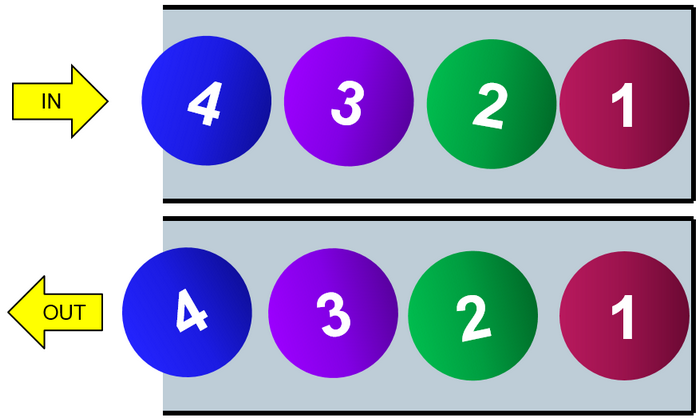

In [13]:
class LIFOQueue(object):
    """Clase de una cola FIFO en los problemas de búsqueda"""
    def __init__(self):
        self.queue = []

    def __str__(self):
        return ' '.join([str(q) for q in self.queue])

    def isEmpty(self):
        """Revisa si la pila es vacía"""
        return self.queue == []

    def push(self, element):
        """Introudce un elemento a la pila"""
        self.queue.append(element)

    def pop(self):
        """Saca el primer elemento de la pila"""
        last_element = self.queue[-1]
        del self.queue[-1]

        return last_element

    def top(self):
        """Muestra el elemento en el tope de la pila"""
        item = self.queue[-1]

        return item

In [14]:
class Node(object):
    """Clase para crear nodos con sus atributos"""
    def __init__(self):
        self.state = (0,0)
        self.parent = None
        self.action = None
        #self.cost = 0 #El costo no es tomado en cuenta en este método

    def __str__(self):
        if self.parent == None:
            return "State: {}".format(self.state)
        else:
            return "State: {}, Action: {}, Parent: {}".format(self.state,self.action,self.parent.state)


def expand(problem, node):
    """Función para expandir los nodos dado el problema"""
    #Nodo inical
    s = node.state

    for action in problem.actions(s):
        #Ejecuta la acción
        new_s = problem.result(s, action)

        #Genera un nuevo nodo
        new_node,new_node.state,new_node.parent,new_node.action = Node(),new_s,node,action

        yield new_node

## Algoritmo

El algoritmo de primero en profundidad usa la pila LIFO para expandir los nodos de mayor profundidad primero. El algoritmo consta de los siguientes pasos:

* Guarda el nodo inicial
* Genera la frontera con este primer nodo, donde la frontera es una pila LIFO
* Mientras la frontera esté vacía realiza:
* Saca el nodo del tope de la pila; es decir, el de mayor profundidad
* Revisa si este nodo es terminal, si lo es termina
* En otro caso, expande el nodo
* Guarda los nodos hijos en la frontera.
* El algoritmo terminará entonces cuando la meta es alcanzada.

Además de la forma de expandir los nodos, este algoritmo se diferencia del primero en amplitud en que la revisión de si un nodo es meta se hace al sacar al nodo de la pila y cuando los nodos hijos se expanden. A esta estrategia se le conoce como Late Goal Test (prueba tardía de meta), pues revisa si el nodo es meta hasta que este ha sido expulsado de la pila y no inmediatamente al ser generado.

In [15]:
def DepthFirstSearch(problem):
    """Algoritmo Breadth-First Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial

    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes

    #Frontera con cola de prioridad
    frontier = LIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Revisa si el nodo es meta
        if problem.is_goal(node.state):
            nodes.append(child)
            return nodes
        #Guarda el nodo en la lista
        nodes.append(node)

        #Expande el nodo actual
        for child in expand(problem, node):
            #Guarda el estado del hijo
            state = child.state

            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)

    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."

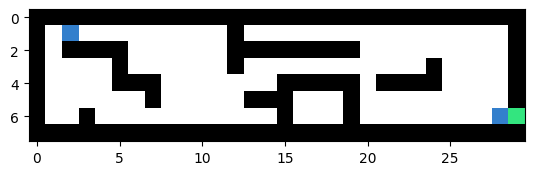

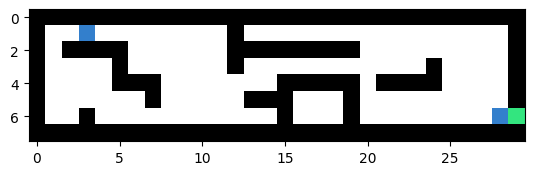

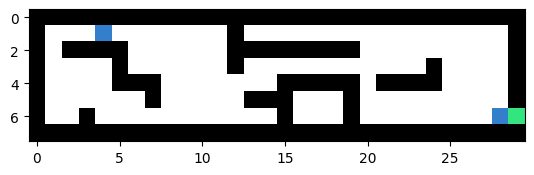

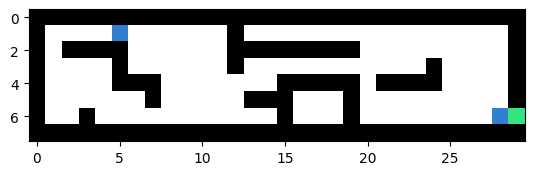

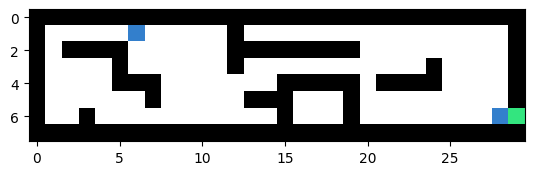

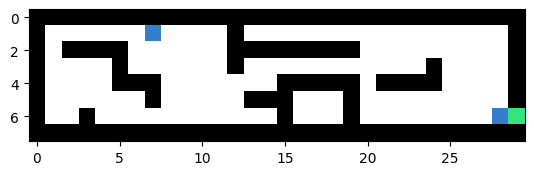

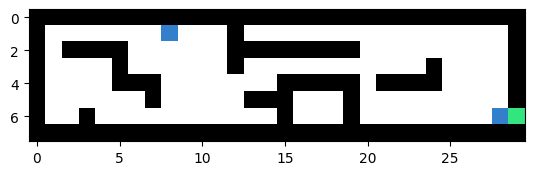

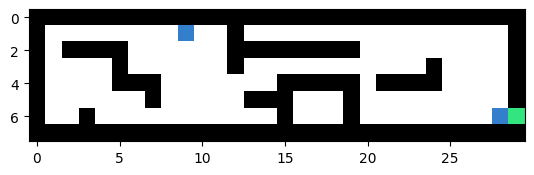

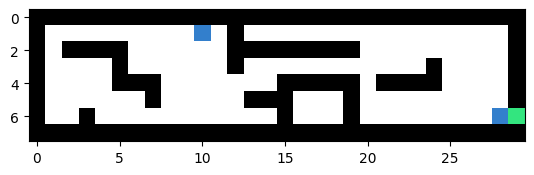

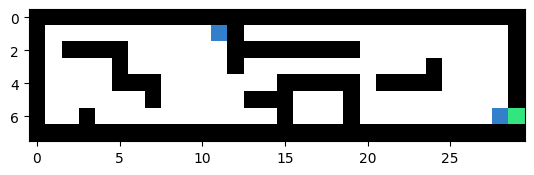

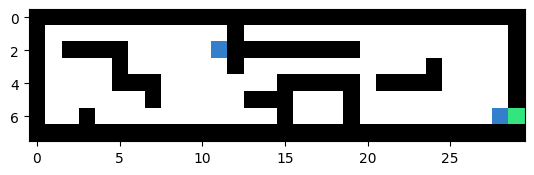

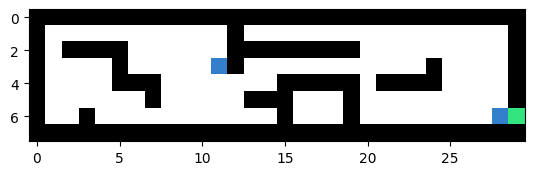

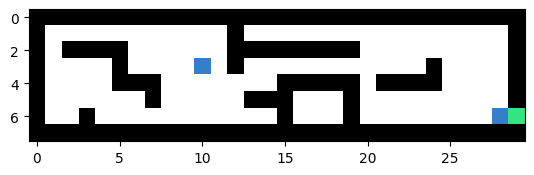

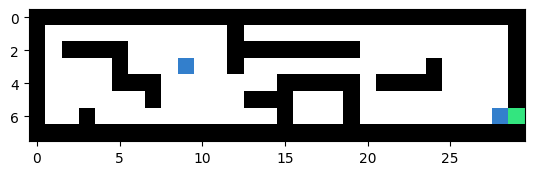

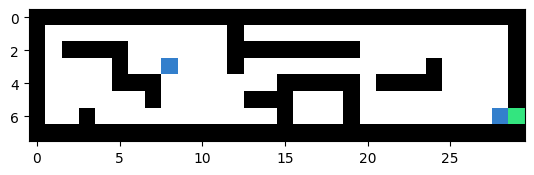

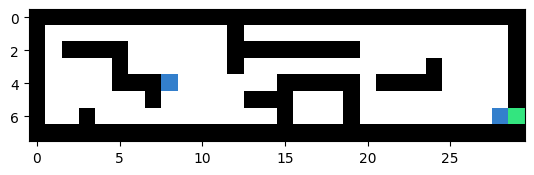

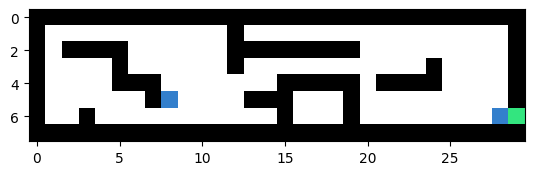

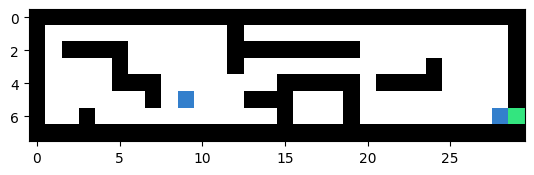

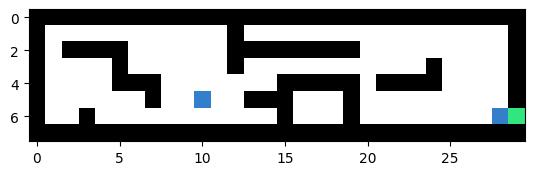

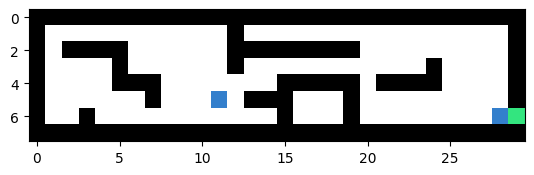

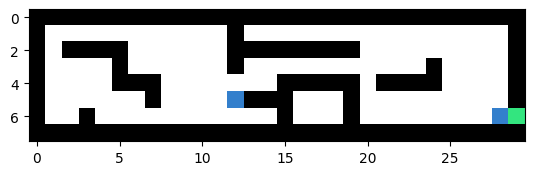

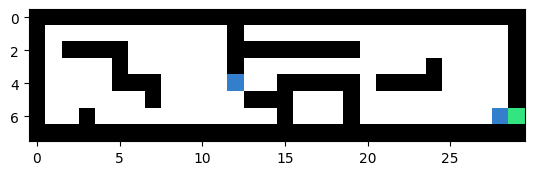

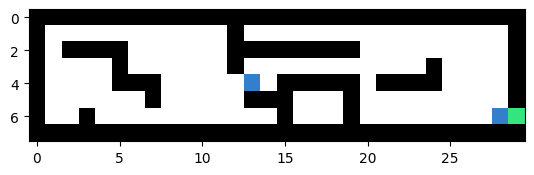

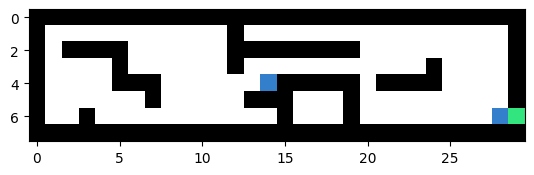

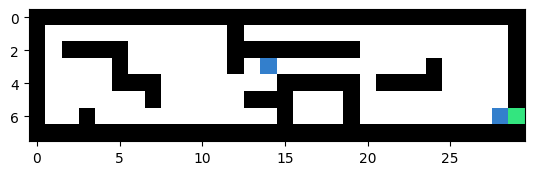

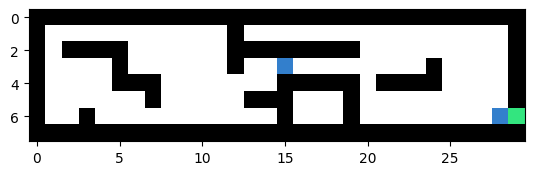

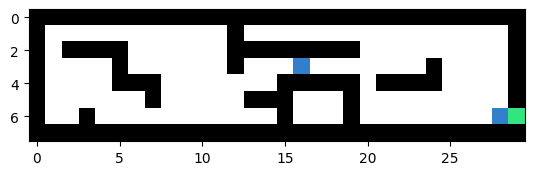

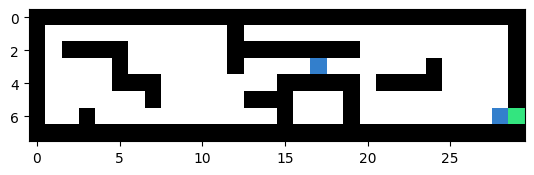

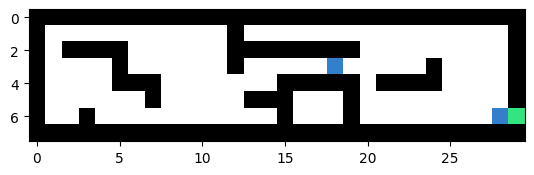

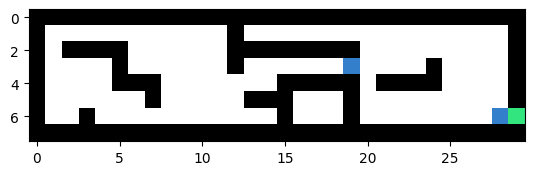

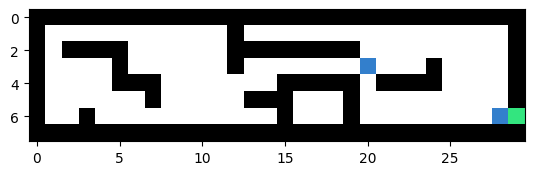

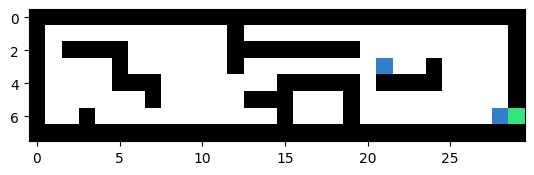

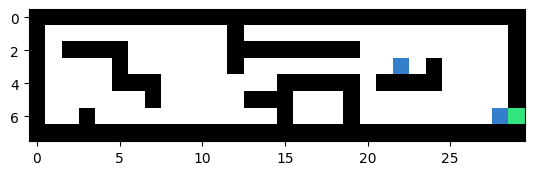

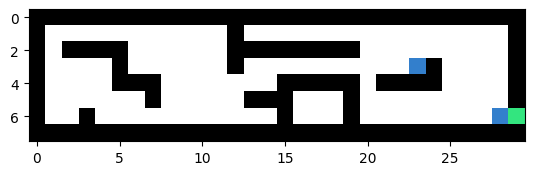

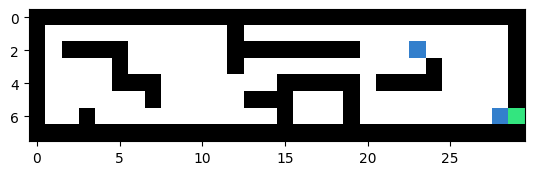

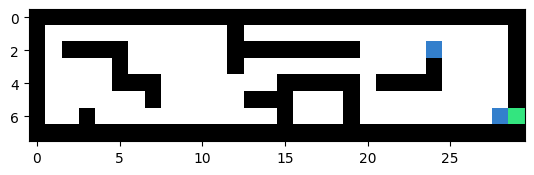

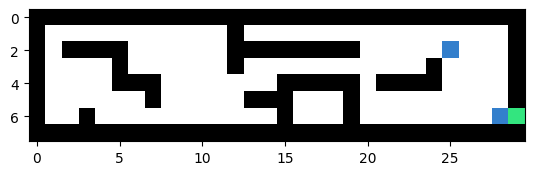

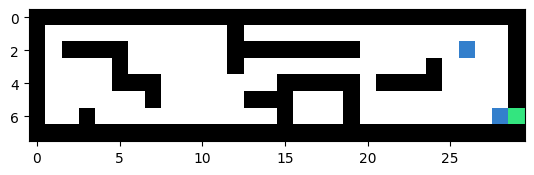

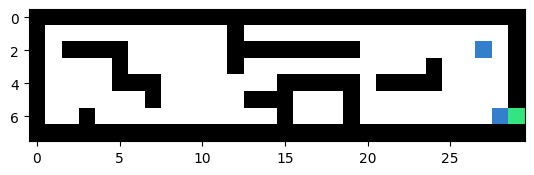

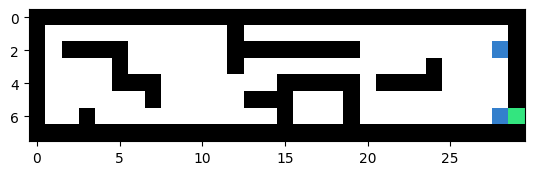

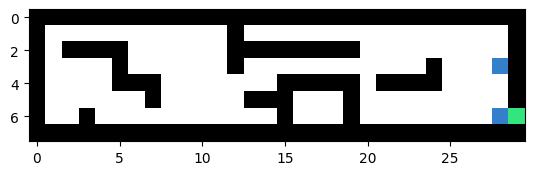

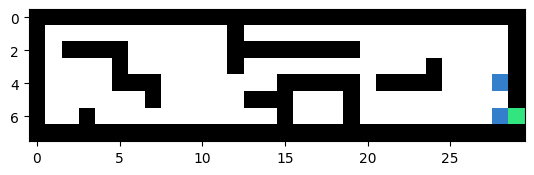

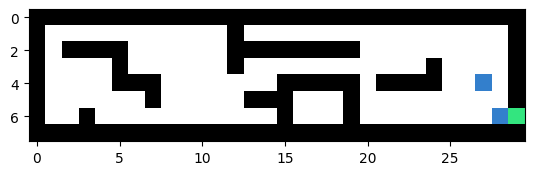

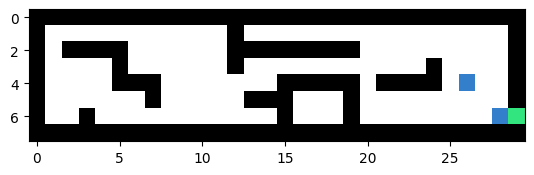

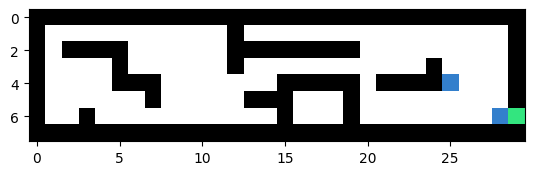

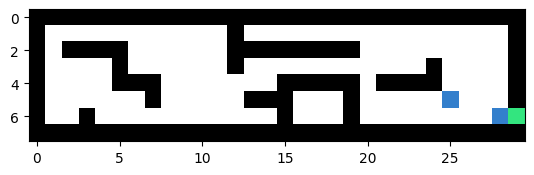

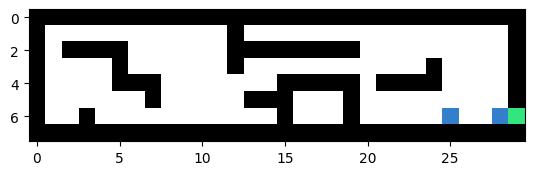

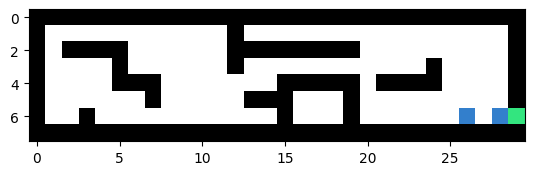

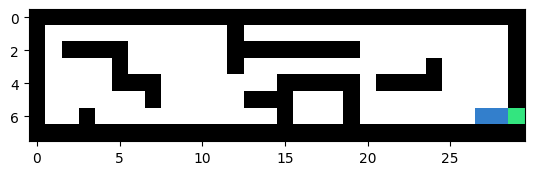

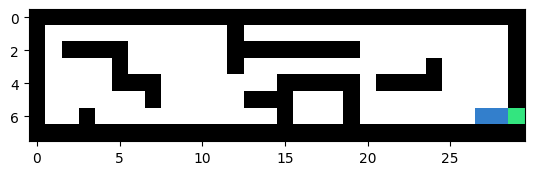

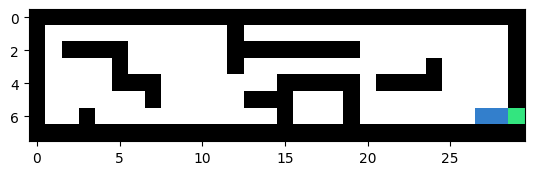

In [18]:
#Aplica el algortimo al problema
tree = DepthFirstSearch(ent)
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino de acciones
    que llevaron a la meta."""
    #Meta
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial
    while parent.state != root:
        parent = parent.parent
        #Adjunta los padres en el camino
        path.append(parent)

    return path[::-1]

#Visualiza la solución
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    ent.draw()



Uno de los problemas del algoritmo de primero en profundidad es que puede encontrar soluciones de mayor longitud, pues si existe una solución no-optima, un camino de mayor longitud en el árbol, esta se seguirá explorando hasta encontrar una solución. Por tanto, si bien puede encontrar una solución, esta no será necesariamente la más óptima. Esto es uno de los riesgos de expandir los nodos más profundos. En este caso, por ejemplo, se nota que la solución encontrada es menos óptima que la encontró el algoritmo de primero en amplitud.